In [1]:
import pandas as pd
import pickle

with open('shows.pickle', 'rb') as handle:
    show_dict = pickle.load(handle)

# vote average is the percent that appears on the site.

In [2]:
show_dict['24 ']

{'backdrop_path': '/zyiX7iPUfuxV4ZAuCaTdmFeEYLQ.jpg',
 'first_air_date': '2001-11-06',
 'genre_ids': [10759, 18],
 'id': 1973,
 'name': '24',
 'origin_country': ['US'],
 'original_language': 'en',
 'original_name': '24',
 'overview': '24 is an American television series produced for the Fox network and syndicated worldwide, starring Kiefer Sutherland as Counter Terrorist Unit agent Jack Bauer. Each 24-episode season covers 24 hours in the life of Bauer, using the real time method of narration.',
 'popularity': 9.671869,
 'poster_path': '/3m83XvlgjIMeBtCHlIyLAsa2GZ1.jpg',
 'vote_average': 7.64,
 'vote_count': 296}

In [3]:
print(len(show_dict['24 '].keys()))
show_dict['24 '].keys()

13


dict_keys(['poster_path', 'origin_country', 'genre_ids', 'original_name', 'original_language', 'vote_count', 'first_air_date', 'popularity', 'name', 'backdrop_path', 'overview', 'vote_average', 'id'])

In [4]:
def clean_show_dict(show_dict):
    #i was too lazy when i made this original dictionary
    show_list = list(show_dict.keys())

    new_dict = dict((x, []) for x in show_dict[show_list[0]])

    for show in show_list:
        for key in new_dict.keys():
            new_dict[key].append(show_dict[show][key])

    new_dict['show_name'] = show_list
    return new_dict

show_dict = clean_show_dict(show_dict)

In [5]:
df = pd.DataFrame(show_dict)

In [6]:
df.shape

(1745, 14)

In [11]:
import time

df.first_air_date = df.first_air_date.apply(lambda x: pd.to_datetime(x))
df['first_air_date_unix'] = df.first_air_date.apply(lambda x: time.mktime(x.timetuple()))

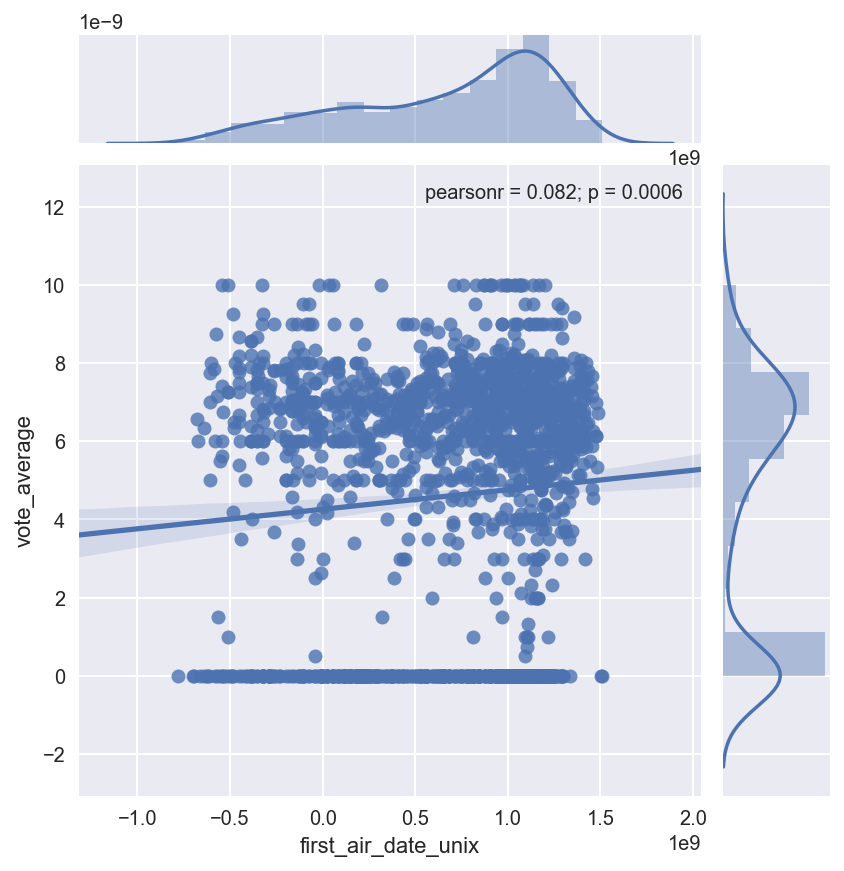

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.jointplot('first_air_date_unix','vote_average', data=df, kind='reg')

In [8]:
df.first_air_date = df.first_air_date.apply(lambda x: pd.to_datetime(x))

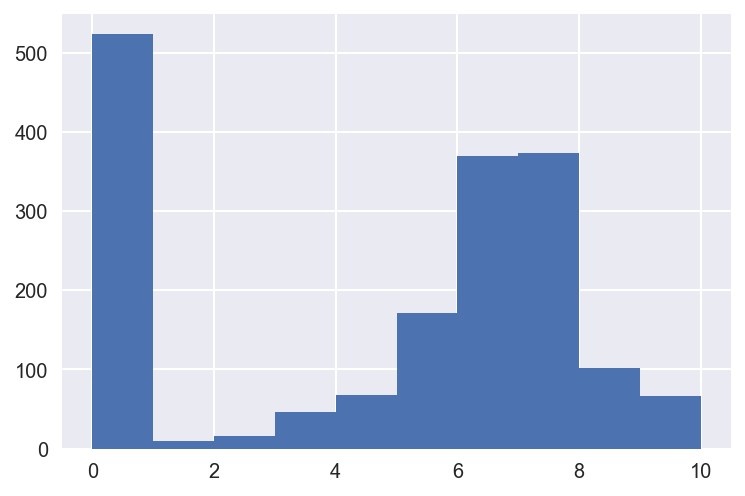

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

df.vote_average.hist();

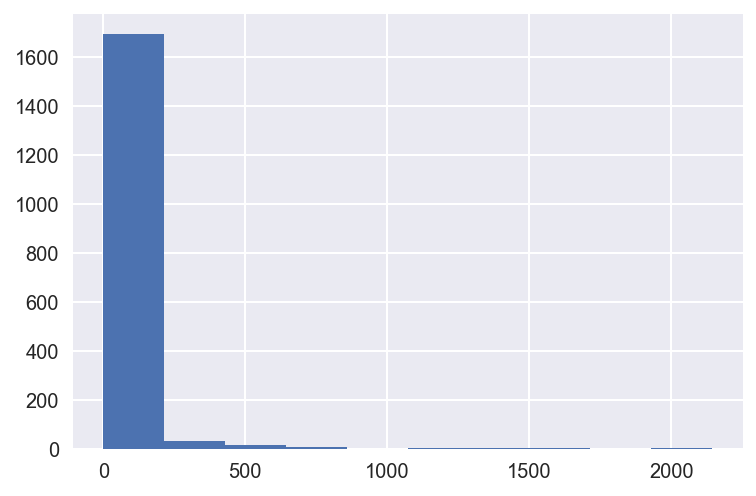

In [10]:
df.vote_count.hist();

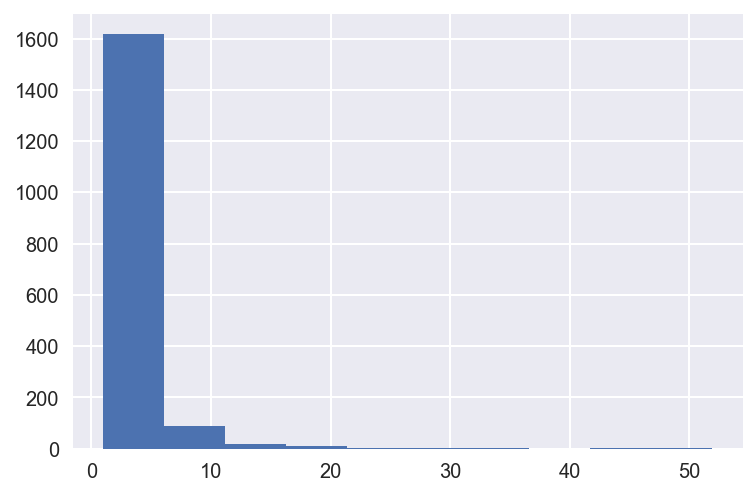

In [11]:
df.popularity.hist();

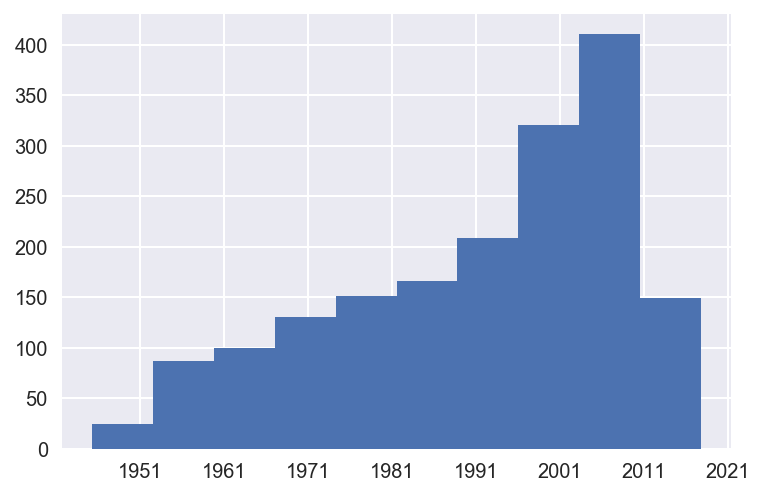

In [12]:
df.first_air_date.hist();

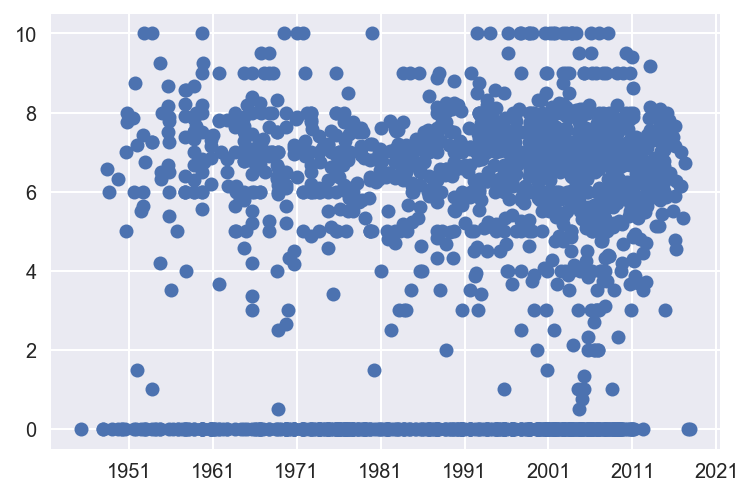

In [13]:
plt.plot(df.first_air_date, df.vote_average, 'o');

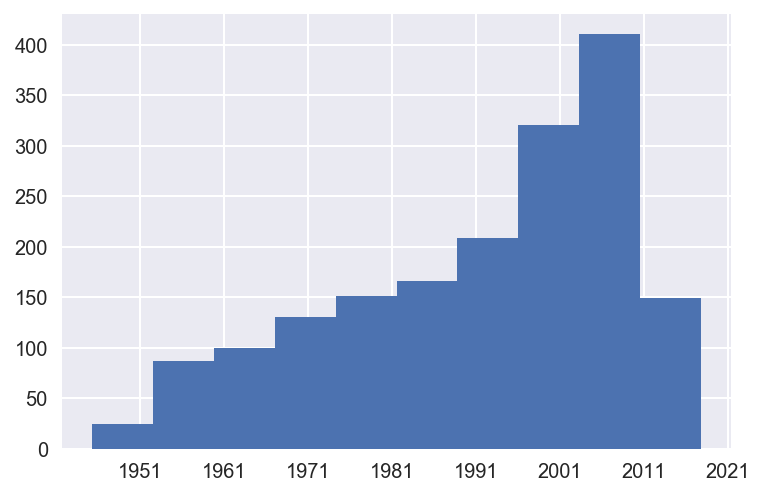

In [14]:
df.first_air_date.hist();

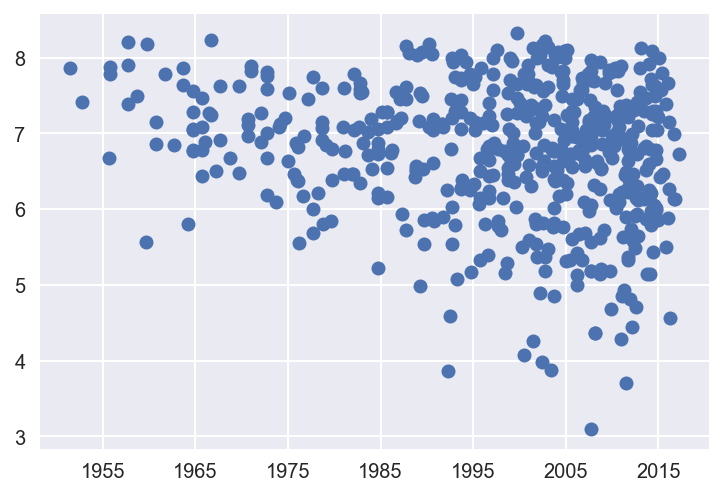

In [27]:
my_filter = df.vote_count > 10

plt.plot(df[my_filter].first_air_date, df[my_filter].vote_average, 'o');

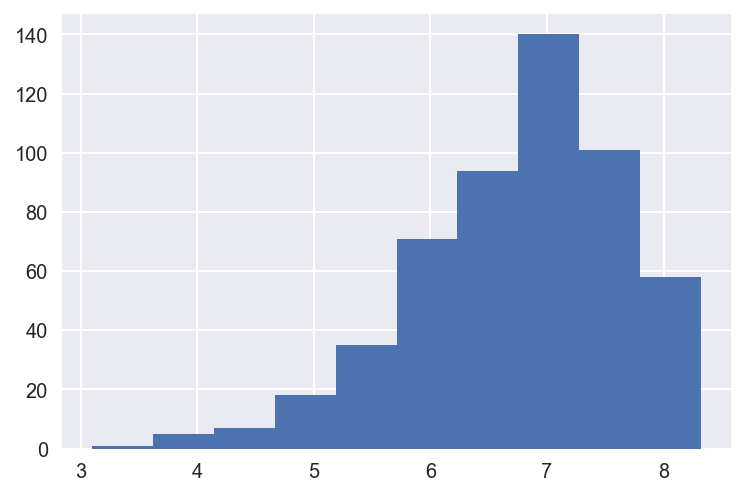

In [28]:
df[my_filter].vote_average.hist();

In [29]:
import time

df['first_air_date_unix'] = df.first_air_date.apply(lambda x: time.mktime(x.timetuple()))

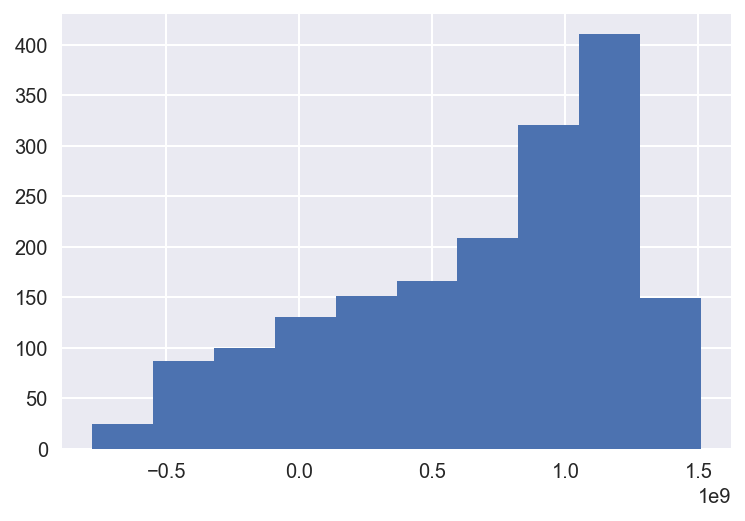

In [30]:
df.first_air_date_unix.hist();

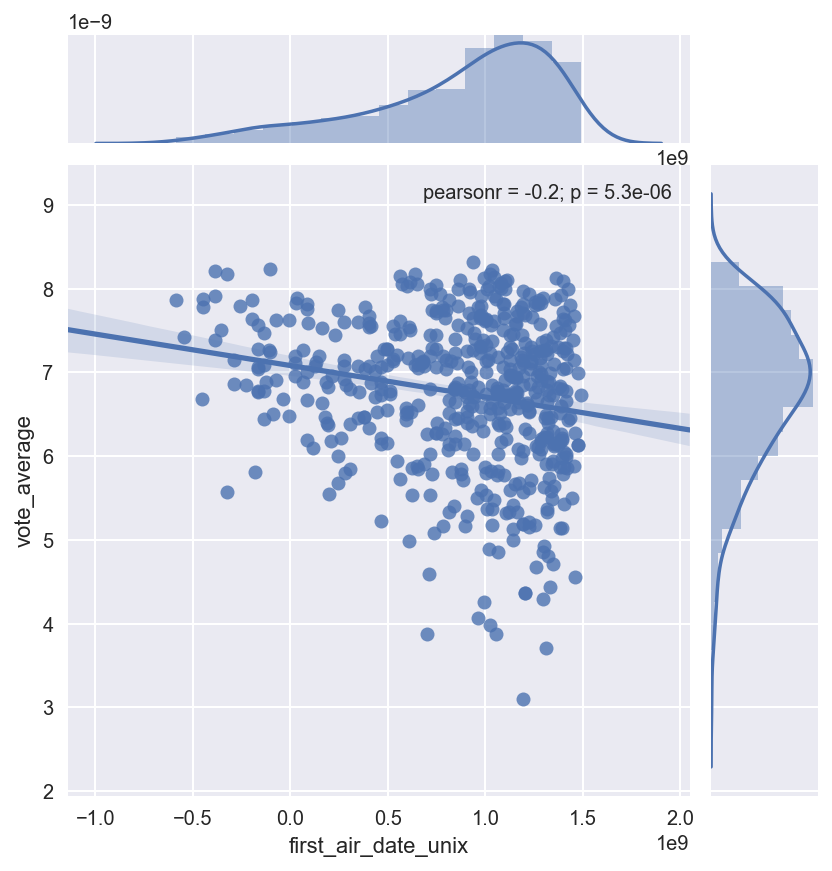

In [32]:
sns.jointplot('first_air_date_unix','vote_average', data=df[my_filter], kind='reg')

In [33]:
df.first_air_date_unix = df.first_air_date_unix+df.first_air_date_unix.min()*-1

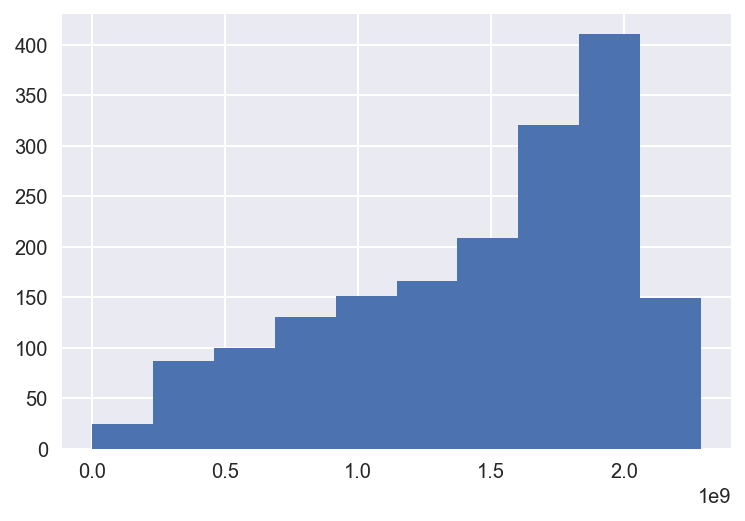

In [34]:
df.first_air_date_unix.hist();

In [35]:
from sklearn import linear_model

X = df[my_filter].first_air_date_unix.values
y = df[my_filter].vote_average.values

lr = linear_model.LinearRegression()
lr.fit(X.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lr.score(X.reshape(-1,1),y.reshape(-1,1))

0.038528573017108547

In [37]:
lr.coef_

array([[ -3.75454395e-10]])